# Project: Wrangle and Analyse Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploring</a></li>
</ul>

# Introduction

In this project we will wrangle and analyse the twitter achive of user [@dog_rates](https://twitter.com/dog_rates "Link to dog_rates at twitter"), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs "More info"). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because [they're good dogs Brent.](https://knowyourmeme.com/memes/theyre-good-dogs-brent "More info") WeRateDogs has over 4 million followers and has received international media coverage.

We have access to the (enhanced) **twitter archive** for WeRateDogs, which holds basic data on the thousands of tweets from the archive. In addition, we will gather data from two more sources:
- Twitter API: As an add-on to the twitter archive we will use this source to get retweet and favorite ("likes") data.
- A file with prediction data, where every image in the WeRateDogs Twitter archive has been run through a neural network that can classify breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Although the main focus of this project is data wrangling, we will also do some exploratory data analysis to answer some questions:
- How are the rating values distributed?
- Has there been any change in ratings over time?
- Is there any correlation between favorite and retweet count?
- How the distribution of the p1 confidence score?

# Data Wrangling

We are going to wrangle WeRateDogs Twitter data to prepare it for later analysis.

## Gather

We are going to gather data from three different sources:
- A file at hand containing basic Twitter data from the archive of WeRateDogs. The data has originally been downloaded programmatically by someone else.
- Twitter API (Application Programming Interface) where we can access additional data, such are retweet count and favorite count ("likes").
- A file that we programmatically download from the internet that contains image prediction data (Every image in the WeRateDogs Twitter archive has been run through a neural network that can classify breeds of dogs).

Each of the three will be stored in a pandas DataFrame.

In [1]:
# importing the required libraries
import requests
import os
import pandas as pd
import numpy as np
import tweepy
import json

First we read the basic Twitter data from WeRateDogs into a pandas DataFrame named df.

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

Second we connect to my Twitter API using tweepy. All keys are hidden.

In [4]:
consumer_key = [hidden]
consumer_secret = [hidden]
access_token = [hidden]
access_secret = [hidden]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

We will need to loop through each twitter_id in df in order to get the data via the API connection. The number tweets that we shall loop through:

In [5]:
number_of_tweets = len(df.tweet_id)
number_of_tweets

2356

For each we use the get_status method on the API object and extract retweet_count and favorite_count. We store it a list of dictionaries named 'data'.

In [6]:
data = {}
data['we_rate_dogs'] = []

for i in range(number_of_tweets):
    tweet_id = df.tweet_id[i]
    
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        data['we_rate_dogs'].append({'tweet_id': str(tweet_id),
                                     'retweet_count': tweet.retweet_count,
                                     'favorite_count': tweet.favorite_count
                                    })
    except:
        pass
    
data

Rate limit reached. Sleeping for: 325


{'we_rate_dogs': [{'tweet_id': '892420643555336193',
   'retweet_count': 7878,
   'favorite_count': 36952},
  {'tweet_id': '892177421306343426',
   'retweet_count': 5850,
   'favorite_count': 31794},
  {'tweet_id': '891815181378084864',
   'retweet_count': 3863,
   'favorite_count': 23957},
  {'tweet_id': '891689557279858688',
   'retweet_count': 8048,
   'favorite_count': 40284},
  {'tweet_id': '891327558926688256',
   'retweet_count': 8709,
   'favorite_count': 38485},
  {'tweet_id': '891087950875897856',
   'retweet_count': 2899,
   'favorite_count': 19350},
  {'tweet_id': '890971913173991426',
   'retweet_count': 1915,
   'favorite_count': 11281},
  {'tweet_id': '890729181411237888',
   'retweet_count': 17593,
   'favorite_count': 62324},
  {'tweet_id': '890609185150312448',
   'retweet_count': 3996,
   'favorite_count': 26629},
  {'tweet_id': '890240255349198849',
   'retweet_count': 6850,
   'favorite_count': 30481},
  {'tweet_id': '890006608113172480',
   'retweet_count': 6831,


We write our 'data' to a file 'data.txt', by treating it as a json object, which lets us use the dump method to store the data in the file.

In [7]:
with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile)

We open the file again as a json file, so that we can use the load method. Now, we extract line by line the retweet_count and favorite_count and append it to a list named 'tweets_list' (along with the tweet_ids). Then we store it in a pandas DataFrame named df_api.

In [8]:
tweets_list = []

with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for p in data['we_rate_dogs']:
        tweets_list.append({'tweet_id': p['tweet_id'],
                            'retweet_count': p['retweet_count'],
                            'favorite_count': p['favorite_count']
                           })

df_api = pd.DataFrame(tweets_list)

Third we will programmatically download the image_predictions file.

In [9]:
# we start by making a folder for the file 
# utilizing the os library's path module's exists method:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Then utilize **requests** library to store the response from the server.

In [10]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [11]:
response

<Response [200]>

Response code 200 means success.

We save the file

In [12]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

Verify it's there

In [13]:
os.listdir(folder_name)

['image-predictions.tsv']

And read it into a pandas DataFrame named df_image_pred

In [14]:
df_image_pred = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

Great. With that we now have our data available in three DataFrames: 
- df 
- df_api
- df_image_pred

## Assess

We will assess our data for tidiness and quality issues, ie. whether we have messy and/or dirty data. For this we will assess both visually and programmatically.

### Tidiness

There are three requirements for tidy data:
1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

#### Tidiness: Visual Assessment

In df the four columns 'doggo', 'floofer', 'pupper' and 'puppo' do not satisfy the first requirement for tidy data, because it is just one variable indicating some category of dog.

The second requirement seems ok, as each tweet (tweet_id) forms a row.

We need to define an observational unit in order to know how to stucture our tables.

In [15]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
757,778624900596654080,NaN,NaN,2016-09-21 16:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,None,None,None,None
827,769212283578875904,NaN,NaN,2016-08-26 16:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is DonDon. He's way up but doesn't feel b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769212283...,12,10,DonDon,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None


Next, df_api looks fairly tidy, but one could argue that it should be added to df. We will concluded on this later.

In [16]:
df_api.sample(5)

,tweet_id,retweet_count,favorite_count
2003,671743150407421952,233,736
657,788908386943430656,13016,28538
410,821153421864615936,10,263
687,784517518371221505,2647,9327
2150,668994913074286592,225,434


df_image_pred also looks tidy. Just need to consider merging tables.

In [17]:
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
1833,836753516572119041,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
565,678278586130948096,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
1696,816450570814898180,https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg,1,web_site,0.352857,False,envelope,0.060107,False,nail,0.031291,False


#### Tidiness: Programmatic Assessment

Now, we will use programmatic assessment to figure out how to satisfy the third requirement for tidiness:
3. Each type of observational unit forms a table

We will use the .info() method to get an overview of the headings in each table.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null object
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [20]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Now let us check whether we have duplicated headers other than 'tweet_id':

In [21]:
all_columns = pd.Series(list(df) + list(df_api) + list(df_image_pred))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

We do not.

### Quality

When checking for quality issues there is no universal standard, so instead we will structure our approach by looking for the following common quality issues:
- Missing data (missing blocks of data, NaN, etc.)
- Invalid data (ie. negative age, text in column that should only contain numbers etc.)
- Inaccurate data (wrong value, for instance human error during manual input)
- Inconsistent data (for instance different units, like cm vs. inches)

In general when looking for such issues, one should at the same time consider: How fit is the data for our purpose?

#### Quality: Visual Assessment

We start with a visual assessment of the quality - for each of our DataFrames.

In [22]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


We note the following:
- (missing data) There's NaN values in five of the columns ('in_reply_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). Let us later check programmatically whether there is data at all in these columns.
- (missing data/inaccurate data) In columns 'name', 'doggo', 'floofer', 'pupper', 'puppo' there are 'None' values that should rather be NaN.
- (inaccurate data) On row 2335 there's a ratings denominator with value 2. Should be 10, so perhaps we cannot trust the numerator either, which is 1.
- (inaccurate data) Some values in the 'name' are not names ('such', 'quite', 'a', 'an', 'the')


In [23]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7878,36952
1,892177421306343426,5850,31794
2,891815181378084864,3863,23957
3,891689557279858688,8048,40284
4,891327558926688256,8709,38485
5,891087950875897856,2899,19350
6,890971913173991426,1915,11281
7,890729181411237888,17593,62324
8,890609185150312448,3996,26629
9,890240255349198849,6850,30481


That seemed fine.

In [24]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


This looks fine too by visual inspection.

#### Quality: Programmatic Assessment

Next we will assess the quality programmatically.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


We note that:
- Some of the columns have missing data
- Timestamp column is of string format, but should rather be datetime.
- Both 'rating_numerator' and 'rating_denominator' have some invalid data. For instance 0 and 0 respectively on the minimum, and 1776 and 170 respectively on the maximum.
- Some columns with very few data entries might be of little value to analysis. This applies to five columns which were highlighted as having missing data in our earlier visual quality assessment.

In [27]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null object
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


- While df had 2356 entries, df_api only has 2331 entries, which means that for 25 tweets in df, it was not possible to retrieve retweet_count and favorite count via the API.

In [28]:
df_api.describe()

,retweet_count,favorite_count
count,2325.000000,2325.000000
mean,2775.907957,7714.078280
std,4704.084897,11983.455855
min,1.000000,0.000000
25%,559.000000,1337.000000
50%,1295.000000,3354.000000
75%,3225.000000,9461.000000
max,79727.000000,159716.000000


We might have some outliers, but nothing that is clearly wrong, so we will not add any further quality issues for df_api.

In [29]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All three tables have 'tweet_id', but in df and df_image_pred the type is integer while in df_api the type is string. It would make sense to make them of equal type. 

df_image_pred only has 2075 entries, while df has 2356. Let us check the intersection of tweet_ids:

In [30]:
s1 = df.tweet_id
s2 = df_image_pred.tweet_id
pd.Series(list(set(s1) & set(s2)))

0       666051853826850816
1       666049248165822465
2       666094000022159362
3       666373753744588802
4       666055525042405380
               ...        
2070    689661964914655233
2071    669214165781868544
2072    834209720923721728
2073    673317986296586240
2074    674790488185167872
Length: 2075, dtype: int64

Since the intersection contains all 2075 tweet_ids, df_image_pred is clearly a subset of df in terms of tweet_ids.

### Assessment: Overview of issues

#### Tidiness issues

- In df the four columns 'doggo', 'floofer', 'pupper' and 'puppo' do not satisfy the first requirement for tidy data, because it is just one variable indicating some category of dog.
- df_api should be merged into df. df_image_pred could be kept separate, but for simpler analysis we will merge it with the others.

#### Quality issues

- There's NaN values in five of the columns ('in_reply_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). These columns with very few data entries might be of little value to analysis.
- In columns 'name', 'doggo', 'floofer', 'pupper', 'puppo' there are 'None' values that should rather be NaN.
- Columns 'source' and 'expanded_urls' in df are not really necessary for our analysis.
- On row 2335 there's a 'ratings_denominator' with value 2. Should be 10.
- Some of the extreme values in the 'ratings_numerator' does not make sense, even with the crazy rating system in use. Ratings larger than 15 I would view as invalid data.
- Some values in the 'name' are not names ('such', 'quite', 'a', 'an', 'the')
- All three tables have 'tweet_id', but in df and df_image_pred the type is integer while in df_api the type is string. It would make sense to make them of equal type. 
- Timestamp column of df is of string format, but should rather be datetime.

## Clean

When cleaning we will adhere to the programmatic data cleaning process:
1. Define
2. Code
3. Test

We create copies of each DataFrame before we start cleaning.

In [220]:
df_clean = df.copy()
df_api_clean = df_api.copy()
df_ip_clean = df_image_pred.copy()

#### Define

Delete columns 'source' and 'expanded_urls' in df, as they are not really necessary for our analysis.

#### Code

In [221]:
cols = ['source', 'expanded_urls']
for col in cols:
    del df_clean[col]

#### Test

In [222]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 276.2+ KB


#### Define

In columns 'name', 'doggo', 'floofer', 'pupper', 'puppo' change 'None' values to NaN.

#### Code

In [223]:
none_name_indexes = df_clean[df_clean.name == 'None'].index

In [224]:
df_clean.loc[none_name_indexes, 'name'] = np.nan

In [225]:
cols = ['name', 'doggo', 'floofer', 'pupper', 'puppo']
for col in cols:
    none_indexes = df_clean[df_clean[col] == 'None'].index
    df_clean.loc[none_indexes, col] = ""

#### Test

In [226]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,12,10,Loki,doggo,,,
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,12,10,Toffee,,,pupper,
933,753655901052166144,NaN,NaN,2016-07-14 18:22:23 +0000,"""The dogtor is in hahahaha no but seriously I'...",NaN,NaN,NaN,10,10,NaN,,,,
1364,702899151802126337,NaN,NaN,2016-02-25 16:53:11 +0000,Say hello to Luna. Her tongue is malfunctionin...,NaN,NaN,NaN,12,10,Luna,,,,
1863,675372240448454658,NaN,NaN,2015-12-11 17:51:04 +0000,"The tail alone is 13/10. Great dog, better own...",NaN,NaN,NaN,13,10,NaN,,,,


#### Define

Based on the five columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'), delete the non-null rows from df_clean and then delete the five columns.

#### Code

In [227]:
df_clean.drop(df_clean[df_clean.retweeted_status_id.isnull() == False].index, inplace=True)

In [228]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
for col in cols:
    del df_clean[col]

#### Test

In [229]:
df_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,NaN,,,,
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,NaN,,,,
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,


#### Define

For our DataFrame 'df_clean' consolidate the four columns 'doggo', 'floofer', 'pupper' and 'puppo' into one column with heading 'stage'.

#### Code

In [231]:
# Some occurrences could have more than one stage. We use groupby to get an overview
df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1831
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [232]:
# We create a 'stage' column and add up the four columns
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# Because they are string it will be concatenated to one word.
# We change that to more readable comma separated terms.
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [236]:
# Finally we delete the four columns, as we do not need them anymore.
cols = ['doggo', 'floofer', 'pupper', 'puppo']
for col in cols:
    del df_clean[col]

#### Test

In [233]:
df_clean.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [238]:
df_clean.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

#### Define

Change the type from int to string for column 'tweet_id' in df_clean and df_ip_clean.

#### Code

In [239]:
df_clean["tweet_id"]= df_clean["tweet_id"].astype(str)
df_ip_clean["tweet_id"]= df_ip_clean["tweet_id"].astype(str)

#### Test

In [240]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
stage                 2175 non-null object
dtypes: int64(2), object(5)
memory usage: 135.9+ KB


In [241]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

Merge all three tables on twitter_id and name the resulting DataFrame 'df_clean'.

#### Code

In [242]:
df_clean = pd.merge(df_clean, df_api_clean, how='inner', left_on='tweet_id', right_on='tweet_id')
df_clean = pd.merge(df_clean, df_ip_clean, how='inner', left_on='tweet_id', right_on='tweet_id')

#### Test

In [243]:
df_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,7878,36952,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,5850,31794,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,3863,23957,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,8048,40284,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,8709,38485,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,NaN,,2899,19350,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,1915,11281,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,NaN,,17593,62324,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,3996,26629,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,6850,30481,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Define

Change 'timestamp' column of df_clean to type datetime.

#### Code

In [244]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [245]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1981
Data columns (total 20 columns):
tweet_id              1982 non-null object
timestamp             1982 non-null datetime64[ns, UTC]
text                  1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null int64
name                  1437 non-null object
stage                 1982 non-null object
retweet_count         1982 non-null int64
favorite_count        1982 non-null int64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1982 non-null object
p3_conf               1982 non-null float64
p3_dog                1982 non-null bool
dtypes: bool(3), datetime64[

#### Define

Set all rating denominators to 10.

#### Code

In [246]:
df_clean['rating_denominator'] = 10

#### Test

In [247]:
df_clean.rating_denominator.value_counts()

10    1982
Name: rating_denominator, dtype: int64

#### Define

#### Code

In [253]:
df_clean.rating_numerator = df_clean.rating_numerator.astype('float64')

In [254]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1981
Data columns (total 20 columns):
tweet_id              1982 non-null object
timestamp             1982 non-null datetime64[ns, UTC]
text                  1982 non-null object
rating_numerator      1982 non-null float64
rating_denominator    1982 non-null int64
name                  1437 non-null object
stage                 1982 non-null object
retweet_count         1982 non-null int64
favorite_count        1982 non-null int64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1982 non-null object
p3_conf               1982 non-null float64
p3_dog                1982 non-null bool
dtypes: bool(3), datetime6

In [257]:
df_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,7878,36952,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,5850,31794,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,3863,23957,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,,8048,40284,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,8709,38485,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10,NaN,,2899,19350,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,,1915,11281,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.0,10,NaN,,17593,62324,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,,3996,26629,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,6850,30481,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [265]:
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings[0] = ratings[0].astype('float64')
x = ratings[0]
x

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
1977     5.0
1978     6.0
1979     9.0
1980     7.0
1981     8.0
Name: 0, Length: 1982, dtype: float64

In [269]:
length = len(x)
for i in range(length):
    if df_clean.rating_numerator[i] > 15:
        df_clean.rating_numerator[i] = x[i]
        

C:\Anaconda3\envs\dand\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Test

In [270]:
df_clean.rating_numerator.value_counts()

12.00      447
10.00      417
11.00      394
13.00      257
9.00       151
8.00        95
7.00        52
14.00       34
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
84.00        1
24.00        1
9.75         1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

#### Define

Drop rows where 'rating_numerator' is larger than 15.

#### Code

In [271]:
df_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,7878,36952,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [272]:
df_clean.drop(df_clean[df_clean.rating_numerator > 15.0].index, inplace=True)

#### Test

In [273]:
df_clean.rating_numerator.value_counts()

12.00    447
10.00    417
11.00    394
13.00    257
9.00     151
8.00      95
7.00      52
14.00     34
5.00      33
6.00      32
3.00      19
4.00      16
2.00       9
1.00       5
0.00       2
11.27      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

#### Define

Whereever the value in the 'name' column is not a name ('such', 'quite', 'a', 'an', 'the'), change it to NaN.

#### Code

In [274]:
df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,7878,36952,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,5850,31794,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,3863,23957,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,,8048,40284,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,8709,38485,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [275]:
ind_noname = df_clean[df_clean['name'].str[0].str.islower().fillna(False)].index

df_clean.loc[ind_noname, 'name'] = np.nan

#### Test

In [276]:
df_clean[df_clean['name'].str[0].str.islower().fillna(False)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Storing the cleaned data

In [277]:
x = df_clean.to_csv(r'twitter_archive_master.csv', encoding='utf-8', index=False, header=True)

## Exploring

We will start by importing pyplot and seaborn, which we will use in our exploring.

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [279]:
dfx = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [280]:
# Noticed that we lost the datatime formatting of timestamp when storing the cleaned data.
# Hence we set it to datetime again
dfx['timestamp'] = pd.to_datetime(dfx['timestamp'])

In [281]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 20 columns):
tweet_id              1966 non-null int64
timestamp             1966 non-null datetime64[ns, UTC]
text                  1966 non-null object
rating_numerator      1966 non-null float64
rating_denominator    1966 non-null int64
name                  1336 non-null object
stage                 302 non-null object
retweet_count         1966 non-null int64
favorite_count        1966 non-null int64
jpg_url               1966 non-null object
img_num               1966 non-null int64
p1                    1966 non-null object
p1_conf               1966 non-null float64
p1_dog                1966 non-null bool
p2                    1966 non-null object
p2_conf               1966 non-null float64
p2_dog                1966 non-null bool
p3                    1966 non-null object
p3_conf               1966 non-null float64
p3_dog                1966 non-null bool
dtypes: bool(3), datetime64[

In [282]:
dfx.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.966000e+03,1966.000000,1966.0,1966.000000,1966.000000,1966.000000,1966.000000,1.966000e+03,1.966000e+03
mean,7.356361e+17,10.529644,10.0,2520.564598,8467.687691,1.204476,0.592937,1.348369e-01,6.036545e-02
std,6.753241e+16,2.200481,0.0,4518.983110,12471.812759,0.563432,0.272129,1.006284e-01,5.085141e-02
min,6.660209e+17,0.000000,10.0,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757183e+17,10.000000,10.0,559.500000,1802.250000,1.000000,0.360093,5.432547e-02,1.621080e-02
50%,7.081252e+17,11.000000,10.0,1204.500000,3799.500000,1.000000,0.587222,1.186345e-01,4.952715e-02
75%,7.873791e+17,12.000000,10.0,2878.000000,10527.750000,1.000000,0.843689,1.955197e-01,9.208967e-02
max,8.924206e+17,14.000000,10.0,79727.000000,159716.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


### How are the rating values distributed?

In [283]:
# We crate a DataFrame frac_table with the ratio of each rating 
# compared to the total number of ratings
frac_table = pd.DataFrame(dfx['rating_numerator'].value_counts()/dfx['rating_numerator'].value_counts().sum())


Fraction of each rating value:


,rating_numerator
12.00,0.227365
10.00,0.212106
11.00,0.200407
13.00,0.130722
9.00,0.076806
8.00,0.048321
7.00,0.026450
14.00,0.017294
5.00,0.016785
6.00,0.016277


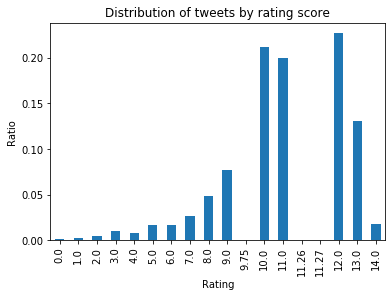

In [284]:
# We use the frac_table to make a bar chart with the distribution of rating scores
ax = frac_table.rating_numerator.sort_index(ascending=True).plot(kind='bar')
ax.set_ylabel('Ratio')
ax.set_xlabel('Rating')
ax.set_title('Distribution of tweets by rating score')
print("\nFraction of each rating value:")
frac_table

We see from the ranked table that a rating of 12 (out of 10) is the most common with 23.1 percent.

From the plot we get a visual of the distribution. It is left-skewed with a peak among ratings in the range \[10, 13\].

### How have the ratings changed over time?

In [285]:
# We convert (truncate) the timestamps to midnight
dfx['timestamp'] = dfx['timestamp'].dt.normalize()

We make a scatterplot to see if we can spot some trends.
(This might not be ideal, as the variables of a scatterplot are supposed to be both continous and numeric). 

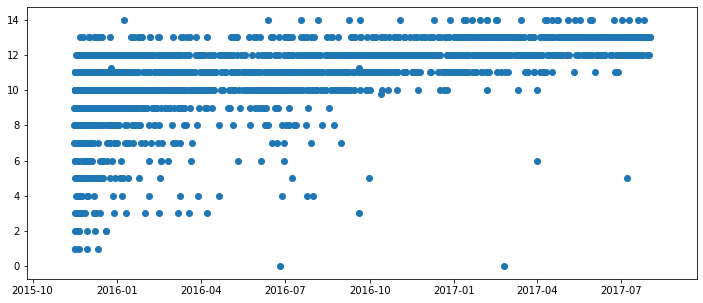

In [286]:
plt.subplots(figsize=(12,5))
plt.scatter(dfx['timestamp'].tolist(), dfx['rating_numerator'])
plt.show()

There is a gradual, but clear shift during 2016, that the ratings below 10 disappear. As we move into 2017 there's also some "inflation" in the high end. For instance, the earlier common score of 10 gets less used, while the earlier very rare score of 14 becomes more normal. 

So it appears that they are indeed good dogs, Brent. And more and more so.

### Is there any correlation between favorite and retweet count?

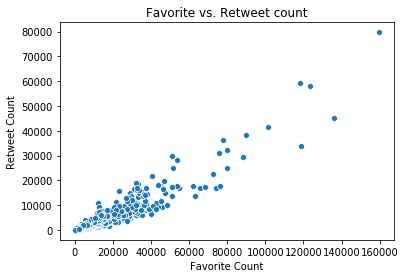

In [287]:
ax = sns.scatterplot(x="favorite_count", y="retweet_count", data=dfx)
ax.set_ylabel('Retweet Count')
ax.set_xlabel('Favorite Count')
ax.set_title('Favorite vs. Retweet count');

Yes, there is positive correlation between favorite and retweet count.

### How the distribution of the p1 confidence score?

"p1_conf is how confident the algorithm is in its #1 prediction"

The p1 confidence says something about the likelihood that the image in question (the image with the highest likelihood if there are more than one image - could be up to 4) is a dog. Like a probability this number is between 0 and 1.

,p1_conf
count,1966.000000
mean,0.592937
std,0.272129
min,0.044333
25%,0.360093
50%,0.587222
75%,0.843689
max,1.000000


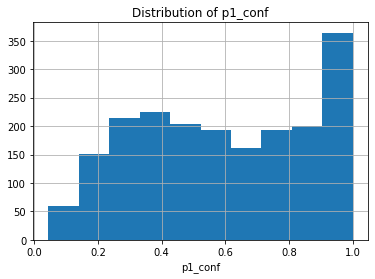

In [288]:
# We use a histogram for this
ax = dfx.p1_conf.hist()
ax.set_xlabel('p1_conf')
ax.set_title('Distribution of p1_conf')
pd.DataFrame(dfx['p1_conf'].describe())

We can see from the histogram that the peak is near 1, ie. in many cases the model is very sure, say at least 90 percent sure, that the image in question is a dog. There is also a smaller peak around 35 percent. It is very rare that the model has a p1_conf of less than 10 percent.

## References

1) Used technique for finding the intersection between two panda Series as suggested in the following Stack Overflow answer: https://stackoverflow.com/questions/18079563/finding-the-intersection-between-two-series-in-pandas